In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Importing required packages.


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
import eli5
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import joblib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [12]:
#reading train and test data
train = pd.read_csv('/content/train.csv', 
                 engine="python",
                 error_bad_lines=False,  
                 encoding='utf-8')
test = pd.read_csv('/content/test.csv', 
                 engine="python",
                 error_bad_lines=False,  
                 encoding='utf-8')

In [13]:
train.head(6)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0


In [14]:
train.shape

(159571, 8)

In [15]:
test.shape

(153164, 2)

In [16]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [17]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [20]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


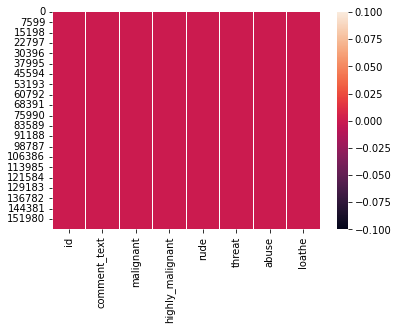

In [22]:
sns.heatmap(train.isnull())

In [23]:
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


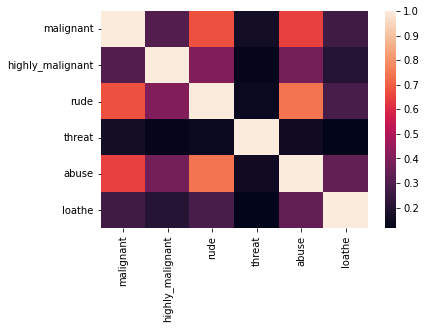

In [24]:
print(sns.heatmap(train.corr()))

In [25]:
# checking the skewness for the features:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


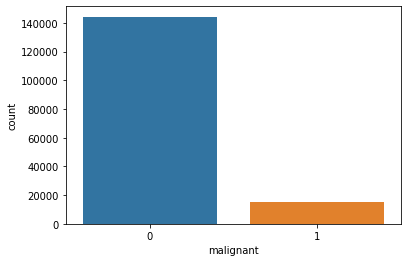

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


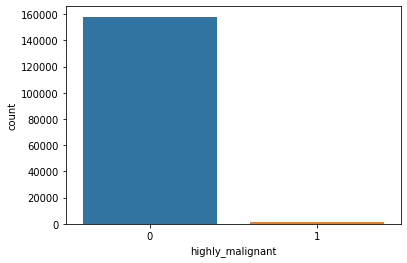

loathe


0    158166
1      1405
Name: loathe, dtype: int64


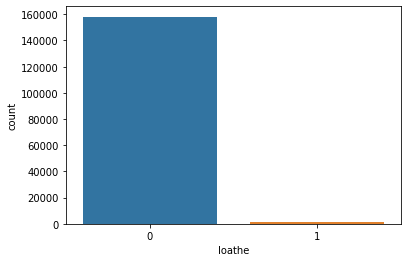

rude


0    151122
1      8449
Name: rude, dtype: int64


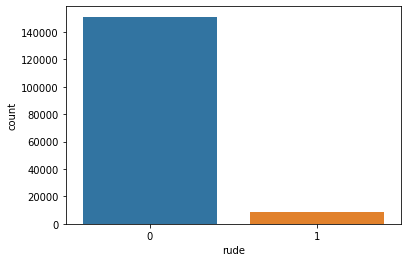

abuse


0    151694
1      7877
Name: abuse, dtype: int64


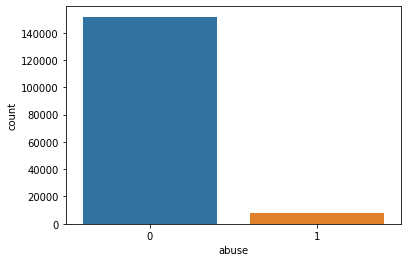

threat


0    159093
1       478
Name: threat, dtype: int64


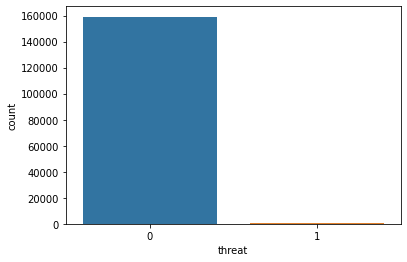

In [26]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

In [27]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [28]:
train['length'] = train['comment_text'].str.len()
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [35]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [36]:
train['clean_length'] = train.comment_text.str.len()
train.head()


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [37]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43537267


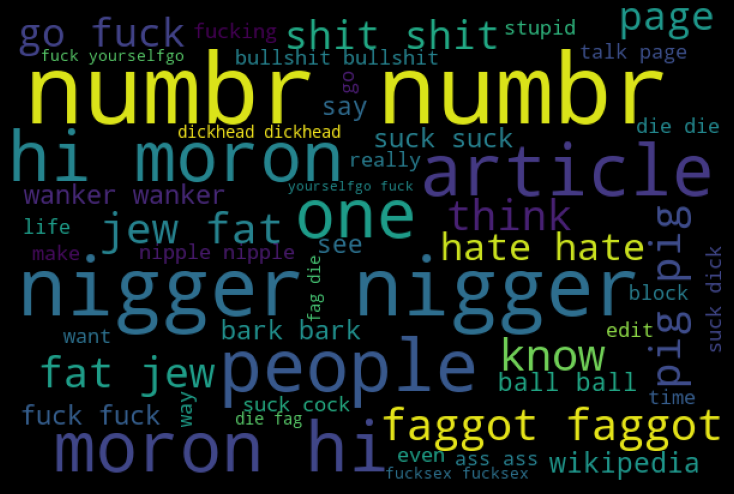

In [38]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

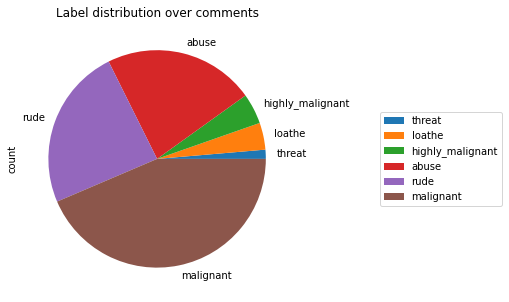

In [40]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [41]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


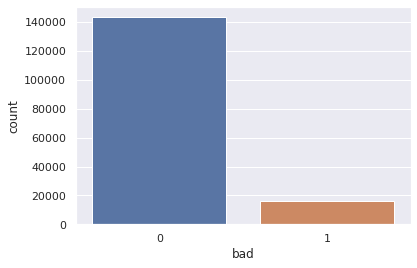

In [42]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [43]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [44]:
train.shape

(159571, 11)

In [45]:
test.shape

(153164, 2)

In [46]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [47]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [48]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9552139037433155
[[42729   221]
 [ 1923  2999]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [49]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988092999937331
Test accuracy is 0.9401111296791443
[[41621  1329]
 [ 1538  3384]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [50]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988092999937331
Test accuracy is 0.9552347927807486
[[42421   529]
 [ 1614  3308]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [51]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9396234523138076
Test accuracy is 0.9366226604278075
[[42846   104]
 [ 2930  1992]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42950
           1       0.95      0.40      0.57      4922

    accuracy                           0.94     47872
   macro avg       0.94      0.70      0.77     47872
weighted avg       0.94      0.94      0.92     47872



In [52]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9510738681635467
Test accuracy is 0.9489263034759359
[[42553   397]
 [ 2048  2874]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [53]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9223627785387515
Test accuracy is 0.917697192513369
[[42812   138]
 [ 3802  1120]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.23      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.92      0.92      0.89     47872



In [54]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987913947304811
Test accuracy is 0.9549841243315508
cross validation score : 95.65835811736271
[[42398   552]
 [ 1603  3319]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.95      0.95     47872



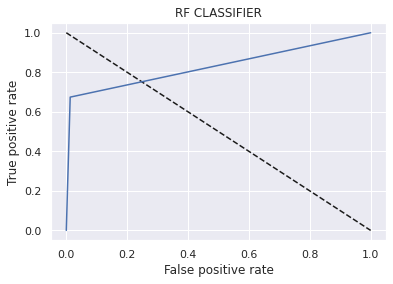

In [55]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [56]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0718 ± 0.0524,fuck
0.0373 ± 0.0430,fucking
0.0295 ± 0.0298,shit
0.0201 ± 0.0172,suck
0.0194 ± 0.0211,bitch
0.0193 ± 0.0113,idiot
0.0191 ± 0.0154,stupid
0.0168 ± 0.0151,asshole
0.0116 ± 0.0121,dick
0.0114 ± 0.0106,faggot


In [57]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data


<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [58]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [59]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']